In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel("Online Retail.xlsx")

df = df.dropna()
df = df[df['Quantity'] > 0]

In [3]:
customer_df = df.groupby('CustomerID').agg({'InvoiceNo': 'nunique', 'Quantity': 'sum', 'UnitPrice': 'sum'})

scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_df)

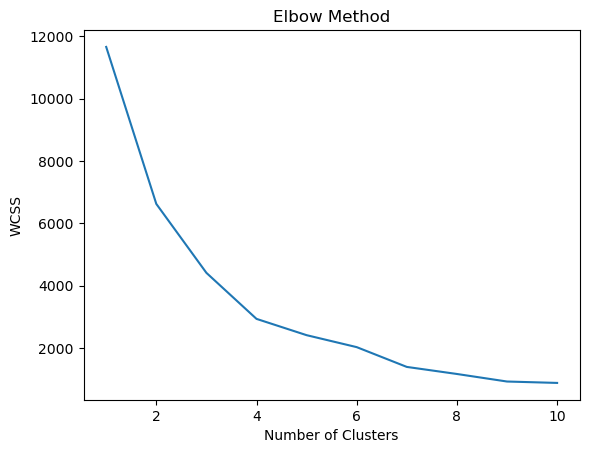

In [4]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

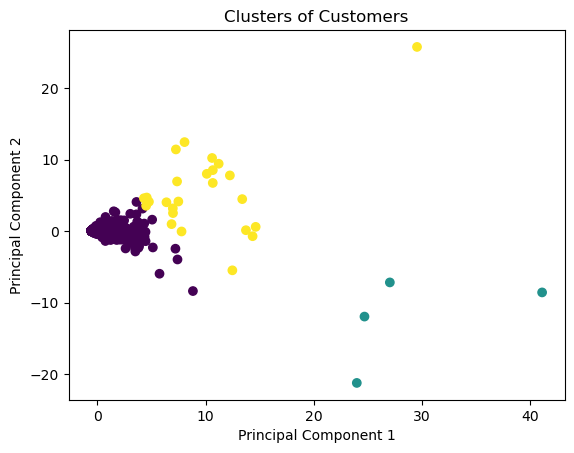

In [5]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(pca_result)

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Clusters of Customers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()